In [2]:
! pip install pandas

In [3]:
import pandas as pd

df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
print(df.shape)
print(df.head())
print(df.info())


(7043, 21)
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Co

In [4]:
import pandas as pd
import numpy as np

# تبدیل TotalCharges به float
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
# نمایش تعداد مقادیر گمشده در هر ستون
print(df.isnull().sum())

# حذف رکوردهایی که TotalCharges آنها NaN شده
df = df.dropna(subset=['TotalCharges'])


customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


In [7]:
cat_cols = df.select_dtypes(include='object').columns.tolist()
print(cat_cols)

['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


In [8]:
import pandas as pd

# 1. خواندن فایل اصلی (مثلاً data.csv)
df_original = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

# 2. ساختن یک کپی از دیتافریم اصلی
df_copy = df_original.copy()

# 3. اعمال تغییرات روی نسخه‌ی کپی
df_copy['Churn'] = df_copy['Churn'].map({'No': 0, 'Yes': 1})

# 4. ذخیره نسخه‌ی تغییر یافته در یک فایل جدید
df_copy.to_csv("data_modified.csv", index=False)

# 5. پیام تایید (اختیاری)
print("تغییرات روی نسخه‌ی کپی اعمال و در فایل 'data_modified.csv' ذخیره شد.")


تغییرات روی نسخه‌ی کپی اعمال و در فایل 'data_modified.csv' ذخیره شد.


In [9]:
print(df.head())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [10]:
import pandas as pd

# 1. خواندن داده
df = pd.read_csv('data_modified.csv')

# 2. نمایش ستون‌ها برای اطمینان (اختیاری)
print("📋 ستون‌های دیتافریم:")
print(df.columns.tolist())

# 3. اعمال One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=[
    'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
    'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
    'PaperlessBilling', 'PaymentMethod'
], drop_first=True)

# 4. نمایش نمونه‌ای از داده‌ها بعد از encoding
print("✅ داده‌های تبدیل‌شده:")
print(df_encoded.head())

# 5. (اختیاری) ذخیره داده جدید برای بررسی یا استفاده بعدی
df_encoded.to_csv('data_modified.csv', index=False)


📋 ستون‌های دیتافریم:
['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']
✅ داده‌های تبدیل‌شده:
   customerID  SeniorCitizen  tenure  MonthlyCharges TotalCharges  Churn  \
0  7590-VHVEG              0       1           29.85        29.85      0   
1  5575-GNVDE              0      34           56.95       1889.5      0   
2  3668-QPYBK              0       2           53.85       108.15      1   
3  7795-CFOCW              0      45           42.30      1840.75      0   
4  9237-HQITU              0       2           70.70       151.65      1   

   gender_Male  Partner_Yes  Dependents_Yes  PhoneService_Yes  ...  \
0        False         True           False             False  ...   
1         True        False         

In [11]:
!pip install scikit-learn

In [12]:
import pandas as pd

# 1. خواندن فایل
df = pd.read_csv('data_modified.csv')

# 2. بررسی اولیه نوع ستون
print("Data type before:", df['TotalCharges'].dtype)

# 3. تبدیل به عدد، مقادیر نامعتبر را NaN می‌کند
df['TotalCharges_clean'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# 4. شناسایی مقادیری که قابل تبدیل به عدد نیستند
non_numeric = df[df['TotalCharges_clean'].isna()]
print("🚫 مقادیر غیرعددی در TotalCharges:")
print(non_numeric[['TotalCharges']])

# 5. تعداد مقادیر نامعتبر
print(f"\n🔢 تعداد مقادیر نامعتبر: {non_numeric.shape[0]}")

# 6. حذف ردیف‌های دارای TotalCharges نامعتبر
df_cleaned = df.dropna(subset=['TotalCharges_clean'])

# 7. جایگزینی ستون TotalCharges با نسخه پاک‌سازی‌شده
df_cleaned['TotalCharges'] = df_cleaned['TotalCharges_clean']
df_cleaned = df_cleaned.drop(columns=['TotalCharges_clean'])

# 8. بررسی نهایی
print("\n✅ تعداد ردیف‌های باقی‌مانده:", df_cleaned.shape[0])
print("نوع ستون TotalCharges بعد از تبدیل:", df_cleaned['TotalCharges'].dtype)

# 9. (اختیاری) ذخیره فایل تمیزشده برای مراحل بعدی
df_cleaned.to_csv('data_modified_clean_totalcharge.csv', index=False)


Data type before: object
🚫 مقادیر غیرعددی در TotalCharges:
     TotalCharges
488              
753              
936              
1082             
1340             
3331             
3826             
4380             
5218             
6670             
6754             

🔢 تعداد مقادیر نامعتبر: 11

✅ تعداد ردیف‌های باقی‌مانده: 7032
نوع ستون TotalCharges بعد از تبدیل: float64


C:\Users\fakba\AppData\Local\Temp\ipykernel_18360\1126313916.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['TotalCharges'] = df_cleaned['TotalCharges_clean']


In [13]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')


In [14]:
print(df['TotalCharges'].isna().sum())


11


In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(df[['tenure', 'MonthlyCharges', 'TotalCharges']])


In [16]:
print(df.head())

   customerID  SeniorCitizen    tenure  MonthlyCharges  TotalCharges  Churn  \
0  7590-VHVEG              0 -1.277445       -1.160323     -0.994194      0   
1  5575-GNVDE              0  0.066327       -0.259629     -0.173740      0   
2  3668-QPYBK              0 -1.236724       -0.362660     -0.959649      1   
3  7795-CFOCW              0  0.514251       -0.746535     -0.195248      0   
4  9237-HQITU              0 -1.236724        0.197365     -0.940457      1   

   gender_Male  Partner_Yes  Dependents_Yes  PhoneService_Yes  ...  \
0        False         True           False             False  ...   
1         True        False           False              True  ...   
2         True        False           False              True  ...   
3         True        False           False             False  ...   
4        False        False           False              True  ...   

   StreamingTV_Yes  StreamingMovies_No internet service  StreamingMovies_Yes  \
0            False      

In [20]:
!pip install seaborn


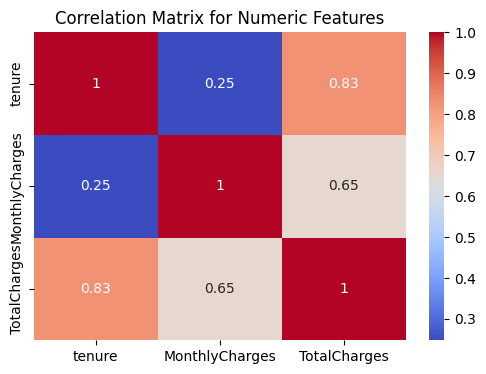

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# ماتریس همبستگی فقط برای ستون‌های عددی
corr_matrix = df[['tenure', 'MonthlyCharges', 'TotalCharges']].corr()

# نمایش heatmap همبستگی
plt.figure(figsize=(6,4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Numeric Features')
plt.show()


In [15]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df_original = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

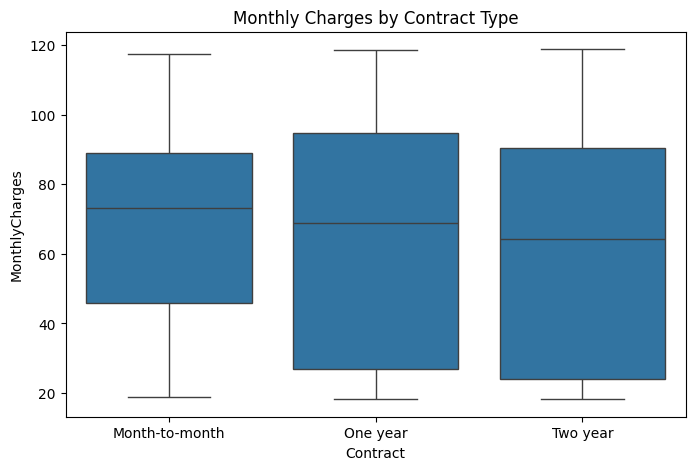

In [16]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Contract', y='MonthlyCharges', data=df_original)  # df_original دیتاست بدون تبدیل به one-hot
plt.title('Monthly Charges by Contract Type')
plt.show()


In [17]:
from scipy.stats import f_oneway

# جدا کردن داده‌ها بر اساس دسته‌بندی
grouped = [group['MonthlyCharges'].values for name, group in df_original.groupby('Contract')]

# انجام آزمون ANOVA
f_stat, p_value = f_oneway(*grouped)

print(f"ANOVA F-statistic: {f_stat:.3f}, p-value: {p_value:.3f}")


ANOVA F-statistic: 20.828, p-value: 0.000


In [18]:
from sklearn.linear_model import LinearRegression
import numpy as np

X = df[['tenure']]  # ویژگی مستقل
y = df['MonthlyCharges']  # متغیر هدف

model = LinearRegression()
model.fit(X, y)

print(f"Coefficient for tenure: {model.coef_[0]:.3f}")
print(f"Intercept: {model.intercept_:.3f}")


Coefficient for tenure: 0.304
Intercept: 54.930


In [17]:
import pandas as pd

# 1. بارگذاری داده از فایل CSV
df = pd.read_csv('data_modified.csv')

# 2. حذف ستون‌های غیرضروری و ذخیره در df_model
df_model = df.drop(['customerID', 'TotalCharges'], axis=1, errors='ignore')

# 3. چاپ ستون‌ها بعد از حذف برای اطمینان
print("ستون‌های باقی‌مانده بعد از حذف:")
print(df_model.columns.tolist())

# 4. جدا کردن متغیر هدف (y) و ویژگی‌ها (X)
y = df_model['MonthlyCharges']
X = df_model.drop('MonthlyCharges', axis=1)

# 5. انجام One-Hot Encoding روی ویژگی‌های غیرعددی
X_encoded = pd.get_dummies(X, drop_first=True)

# 6. نمایش ستون‌های نهایی بعد از encoding برای اطمینان
print("\nستون‌های نهایی پس از one-hot encoding:")
print(X_encoded.columns.tolist())

# 7. چک کردن اینکه آیا ستون customerID در هیچ مرحله‌ای وجود دارد
print("\nستون‌هایی که حاوی 'customerID' هستند:")
print([col for col in X_encoded.columns if 'customerID' in col])


ستون‌های باقی‌مانده بعد از حذف:
['SeniorCitizen', 'tenure', 'MonthlyCharges', 'Churn', 'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes', 'MultipleLines_No phone service', 'MultipleLines_Yes', 'InternetService_Fiber optic', 'InternetService_No', 'OnlineSecurity_No internet service', 'OnlineSecurity_Yes', 'OnlineBackup_No internet service', 'OnlineBackup_Yes', 'DeviceProtection_No internet service', 'DeviceProtection_Yes', 'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No internet service', 'StreamingTV_Yes', 'StreamingMovies_No internet service', 'StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']

ستون‌های نهایی پس از one-hot encoding:
['SeniorCitizen', 'tenure', 'Churn', 'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes', 'MultipleLines_No phone service', 'MultipleLines_Yes', 'InternetService

In [18]:
import pandas as pd
# ذخیره دیتافریم اصلاح شده در فایل جدید یا جایگزین فایل قبلی
df_model.to_csv('data_modified.csv', index=False)


In [19]:
print(df_model.columns)


Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'Churn', 'gender_Male',
       'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')


In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)


In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# مدل رگرسیون خطی
lr = LinearRegression()
lr.fit(X_train, y_train)

# پیش‌بینی
y_pred_lr = lr.predict(X_test)

# ارزیابی مدل
r2 = r2_score(y_test, y_pred_lr)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_lr))

print(f"Linear Regression R² score: {r2:.3f}")
print(f"Linear Regression RMSE: {rmse:.2f}")


Linear Regression R² score: 0.999
Linear Regression RMSE: 1.05


In [22]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# ساخت مدل
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# آموزش مدل روی داده‌های آموزشی
rf.fit(X_train, y_train)

# پیش‌بینی روی داده‌های تست
y_pred_rf = rf.predict(X_test)

# ارزیابی مدل
print(f"Random Forest R² score: {r2_score(y_test, y_pred_rf):.3f}")
rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print(f"Random Forest RMSE: {rmse:.2f}")


Random Forest R² score: 0.998
Random Forest RMSE: 1.27


In [23]:
!pip install xgboost


In [24]:
import xgboost as xgb
from sklearn.metrics import r2_score, mean_squared_error

xgb_model = xgb.XGBRegressor(
    objective='reg:squarederror',  # تابع هدف رگرسیون
    n_estimators=100,              # تعداد درخت‌ها
    learning_rate=0.1,             # نرخ یادگیری
    max_depth=3,                   # عمق هر درخت
    subsample=0.8,                 # درصد داده برای هر درخت
    colsample_bytree=0.8,          # درصد ویژگی‌ها برای هر درخت
    random_state=42
)

xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

# ارزیابی مدل
print(f"XGBoost R² score: {r2_score(y_test, y_pred_xgb):.3f}")
rmse = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
print(f"XGBoost RMSE: {rmse:.2f}")



XGBoost R² score: 0.999
XGBoost RMSE: 1.13


In [25]:
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)


In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor

# 1. خواندن داده
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

# 2. تبدیل مقادیر غیرعددی به عددی
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# 3. حذف مقادیر خالی
df.dropna(inplace=True)

# 4. وان‌هات‌انکودینگ برای ویژگی‌های متنی
df = pd.get_dummies(df)

# 5. جدا کردن ویژگی‌ها و هدف
X = df.drop("MonthlyCharges", axis=1)
y = df["MonthlyCharges"]

# 6. تقسیم داده به آموزش و تست
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 7. تعریف و آموزش مدل
model = XGBRegressor()
model.fit(X_train, y_train)

# 8. پیش‌بینی
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# 9. محاسبه RMSE
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f"Train RMSE: {train_rmse:.2f}")
print(f"Test RMSE: {test_rmse:.2f}")


Train RMSE: 0.87
Test RMSE: 1.19


In [27]:
print(f"Train RMSE: {train_rmse:.2f}")
print(f"Test RMSE: {test_rmse:.2f}")

gap = test_rmse - train_rmse
if gap > 10:
    print("🔴 احتمالاً مدل Overfitting شده است (Variance بالا)")
elif gap < -10:
    print("🟠 احتمالاً Underfitting داریم (Bias بالا)")
else:
    print("🟢 مدل تعادل خوبی دارد (Bias/Variance مناسب)")


Train RMSE: 0.87
Test RMSE: 1.19
🟢 مدل تعادل خوبی دارد (Bias/Variance مناسب)


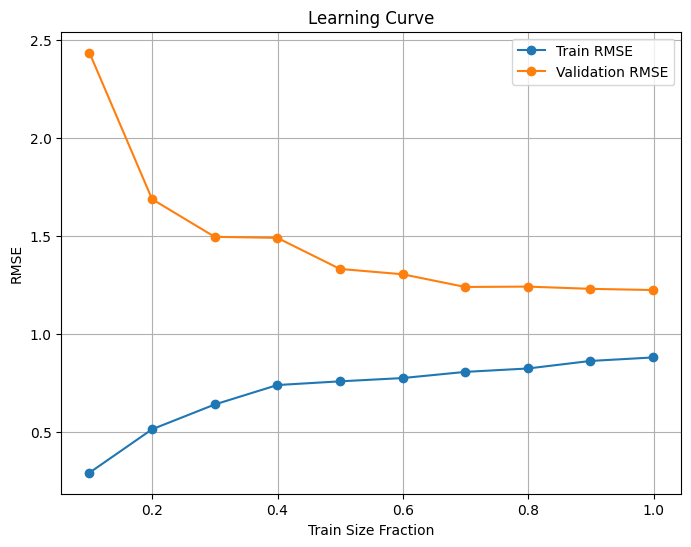

In [28]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

train_sizes = np.linspace(0.1, 0.999, 10)  # از ۱۰٪ تا ۹۹.۹٪ داده‌ها

train_rmse = []
test_rmse = []

for train_size in train_sizes:
    # تقسیم داده به زیرمجموعه‌های train با اندازه train_size و بقیه برای validation (test)
    X_train_sub, X_val_sub, y_train_sub, y_val_sub = train_test_split(
        X_train, y_train, train_size=train_size, random_state=42
    )
    
    # آموزش مدل روی زیرمجموعه train
    model.fit(X_train_sub, y_train_sub)
    
    # پیش‌بینی روی train و validation
    y_train_pred = model.predict(X_train_sub)
    y_val_pred = model.predict(X_val_sub)
    
    # محاسبه RMSE برای train و validation
    train_rmse.append(np.sqrt(mean_squared_error(y_train_sub, y_train_pred)))
    test_rmse.append(np.sqrt(mean_squared_error(y_val_sub, y_val_pred)))

# رسم نمودار learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_rmse, label="Train RMSE", marker='o')
plt.plot(train_sizes, test_rmse, label="Validation RMSE", marker='o')
plt.xlabel("Train Size Fraction")
plt.ylabel("RMSE")
plt.title("Learning Curve")
plt.legend()
plt.grid(True)
plt.show()


In [29]:
df.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'customerID_0002-ORFBO', 'customerID_0003-MKNFE',
       'customerID_0004-TLHLJ', 'customerID_0011-IGKFF',
       'customerID_0013-EXCHZ', 'customerID_0013-MHZWF',
       ...
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_No',
       'PaperlessBilling_Yes', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Churn_No', 'Churn_Yes'],
      dtype='object', length=7079)

In [30]:
import joblib
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# فرض کنیم X_train, y_train از قبل آماده‌ست

# تعریف مدل پایه
model = RandomForestRegressor(random_state=42)

# شبکه پارامترها برای جستجوی شبکه‌ای
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20]
}

# تعریف GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')

# آموزش مدل با داده‌های آموزشی
grid_search.fit(X_train, y_train)

# دریافت بهترین مدل پس از جستجو
best_model = grid_search.best_estimator_

# ذخیره بهترین مدل در فایل
joblib.dump(best_model, 'best_model.pkl')
print("Model saved successfully!")

# --- برای بارگذاری مدل ذخیره شده ---
loaded_model = joblib.load('best_model.pkl')

# استفاده از مدل بارگذاری شده برای پیش‌بینی
y_pred = loaded_model.predict(X_test)


Model saved successfully!


In [31]:
import joblib

model_columns = list(X_train.columns)  # یا داده‌هایی که مدل باهاش آموزش دیده
joblib.dump(model_columns, 'model_columns.pkl')

['model_columns.pkl']

In [32]:
!pip install --upgrade notebook ipywidgets


  Using cached notebook-7.4.3-py3-none-any.whl.metadata (10 kB)
  Using cached jupyterlab-4.4.3-py3-none-any.whl.metadata (16 kB)
Using cached notebook-7.4.3-py3-none-any.whl (14.3 MB)
Using cached jupyterlab-4.4.3-py3-none-any.whl (12.3 MB)

  Attempting uninstall: jupyterlab

    Found existing installation: jupyterlab 4.3.4

   ---------------------------------------- 0/2 [jupyterlab]
    Uninstalling jupyterlab-4.3.4:
   ---------------------------------------- 0/2 [jupyterlab]
   ---------------------------------------- 0/2 [jupyterlab]
   ---------------------------------------- 0/2 [jupyterlab]
   ---------------------------------------- 0/2 [jupyterlab]
   ---------------------------------------- 0/2 [jupyterlab]
   ---------------------------------------- 0/2 [jupyterlab]
   ---------------------------------------- 0/2 [jupyterlab]
   ---------------------------------------- 0/2 [jupyterlab]
   ---------------------------------------- 0/2 [jupyterlab]
   ----------------------

C:\Users\fakba\anaconda3\envs\dynamicpricing\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


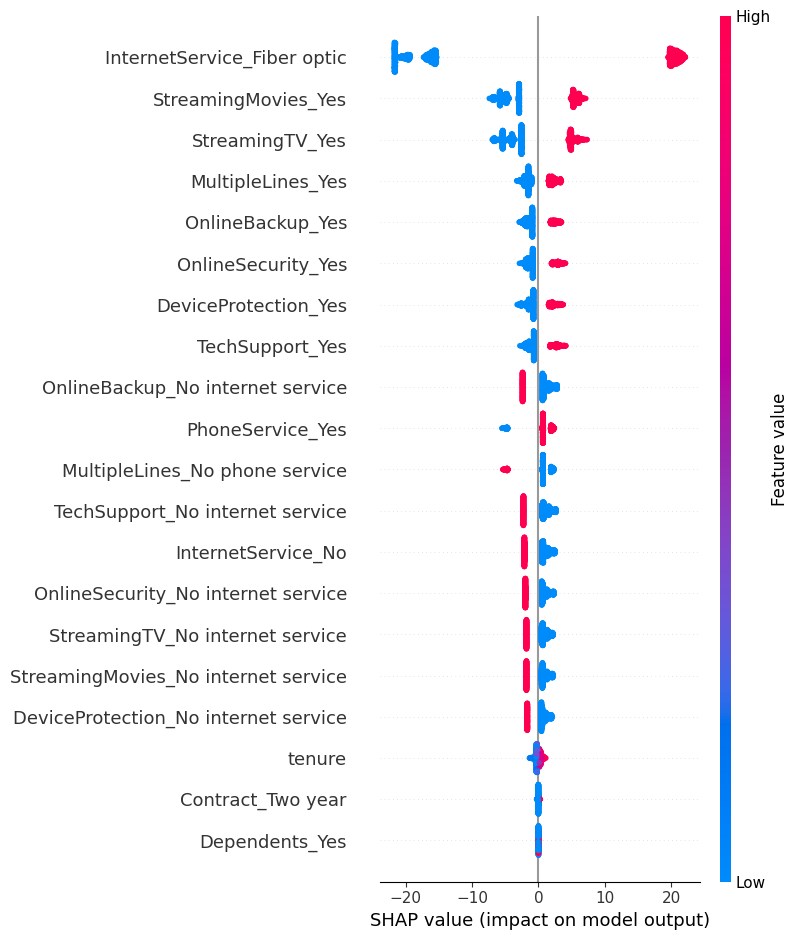

In [30]:
import shap

explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_test)

# نمایش summary plot
shap.summary_plot(shap_values, X_test)


In [33]:
model_columns[:5]  # نمایش ۵ ستون اول برای چک سریع


['SeniorCitizen',
 'tenure',
 'TotalCharges',
 'customerID_0002-ORFBO',
 'customerID_0003-MKNFE']

In [35]:
import pandas as pd
import joblib
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error

# 1. خواندن داده‌ها (دیتایی که قبلاً encoding شده)
df = pd.read_csv('data_modified.csv')  # ← فایل شما که ستون‌هاش نرمالایز شده

# 2. حذف ردیف‌های ناقص (در صورت وجود)
df = df.dropna()

# 3. تعریف target و features
target = 'MonthlyCharges'
X = df.drop(columns=[target])
y = df[target]

# 4. ذخیره ستون‌های ویژگی برای Streamlit
model_columns = list(X.columns)
joblib.dump(model_columns, 'model_columns.pkl')
print("✅ model_columns.pkl ذخیره شد.")

# 5. تقسیم آموزش و تست
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. تعریف مدل و GridSearch
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20]
}
model = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# 7. بهترین مدل
best_model = grid_search.best_estimator_
print("✅ مدل آموزش دید.")

# 8. ذخیره مدل
joblib.dump(best_model, 'best_model.pkl')
print("✅ best_model.pkl ذخیره شد.")

# 9. بررسی عملکرد مدل
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"📊 Mean Squared Error روی داده تست: {mse:.2f}")


✅ model_columns.pkl ذخیره شد.
✅ مدل آموزش دید.
✅ best_model.pkl ذخیره شد.
📊 Mean Squared Error روی داده تست: 1.52


In [36]:
import pandas as pd

# خواندن فایل CSV اولیه
df_model = pd.read_csv('data.csv')

# اعمال تغییرات دلخواه روی df_model (در صورت نیاز)
# مثلاً:
# df_model = df_model.dropna()

# ذخیره دیتافریم اصلاح شده
df_model.to_csv('data_modified.csv', index=False)


FileNotFoundError: [Errno 2] No such file or directory: 'data.csv'

In [39]:
# -------------------- وارد کردن کتابخانه‌ها --------------------
import pandas as pd
import numpy as np
import mlflow
import mlflow.sklearn
import joblib
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error

# -------------------- فرض: داده آماده است --------------------
# اگر داده‌ات در فایل CSV است:
# df = pd.read_csv('your_data.csv')

# لیست جدید ویژگی‌ها
features = ['SeniorCitizen', 'tenure', 'Churn', 'gender_Male',
            'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
            'MultipleLines_No phone service', 'MultipleLines_Yes',
            'InternetService_Fiber optic', 'InternetService_No',
            'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
            'OnlineBackup_No internet service', 'OnlineBackup_Yes',
            'DeviceProtection_No internet service', 'DeviceProtection_Yes',
            'TechSupport_No internet service', 'TechSupport_Yes',
            'StreamingTV_No internet service', 'StreamingTV_Yes',
            'StreamingMovies_No internet service', 'StreamingMovies_Yes',
            'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
            'PaymentMethod_Credit card (automatic)',
            'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']

target = 'MonthlyCharges'

# فرض: df از قبل شامل ستون‌های نهایی آماده است (مثلاً با get_dummies آماده شده)
X = df[features]
y = df[target]

# تقسیم داده‌ها
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# -------------------- تنظیم پروژه در MLflow --------------------
mlflow.set_experiment("MonthlyCharges_Prediction")

# -------------------- شروع ثبت در MLflow --------------------
with mlflow.start_run():

    # تعریف مدل و شبکه پارامترها
    model = RandomForestRegressor(random_state=42)
    param_grid = {
        'n_estimators': [50, 100],
        'max_depth': [None, 10, 20]
    }

    # Grid Search
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_

    # پیش‌بینی و ارزیابی
    y_pred = best_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mse ** 0.5

    # -------------------- لاگ در MLflow --------------------
    mlflow.log_params(grid_search.best_params_)
    mlflow.log_metric("mse", mse)
    mlflow.log_metric("rmse", rmse)
    mlflow.sklearn.log_model(best_model, "random_forest_model")

    # ذخیره مدل با joblib (اختیاری)
    joblib.dump(best_model, 'best_model.pkl')

    print(f"Model trained and logged with RMSE: {rmse:.2f}")
    print("Model saved as best_model.pkl")


2025/06/25 12:37:16 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/06/25 12:37:25 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Model trained and logged with RMSE: 1.22
Model saved as best_model.pkl


In [35]:
pip install mlflow scikit-learn pandas joblib
